In [87]:
# Load affinities
import daisy
import z5py
import numpy as np
from matplotlib import pyplot as plt
import lsd
import waterz
aff_file = '/groups/funke/funkelab/sheridana/lsd_experiments/cremi/03_predict/' \
'setup04/500000/testing/sample_C_padded_20160501.aligned.filled.cropped.62:153.n5'
affs = z5py.File(aff_file, use_zarr_format=False, mode='r')['volumes/affs']


In [88]:
bb_begin = (30, 500, 500)
bb_end = (60, 800, 800)
aff_crop = affs[:, bb_begin[0]:bb_end[0],  bb_begin[1]:bb_end[1],  bb_begin[2]:bb_end[2]]
z_section = 15

Text(0.5, 1.0, 'predicted affinities')

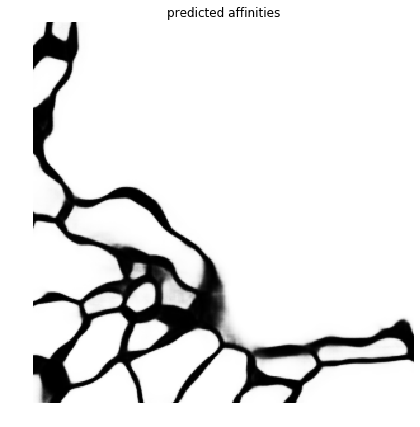

In [91]:
fig, ax = plt.subplots(figsize=(7,7))
plt.imshow(np.squeeze(aff_crop[0, z_section, :500, :500]), cmap='gray')
ax.axis('off')  # clear x- and y-axes
plt.title('predicted affinities')

In [92]:
fragments, n = lsd.fragments.watershed_from_affinities(aff_crop, 
                              fragments_in_xy=True,
                              return_seeds=False,epsilon_agglomerate=0.0)


Text(0.5, 1.0, 'Initial Fragments')

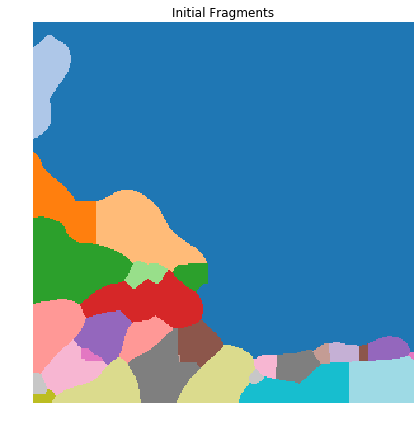

In [93]:
fig, ax = plt.subplots(figsize=(7,7))

im = ax.imshow(fragments[z_section, :], cmap='tab20')
ax.axis('off')  # clear x- and y-axes
plt.title('Initial Fragments')

# Agglomeration parameters
- scoring_function='OneMinus<MeanAffinity<RegionGraphType, ScoreValue>>' # what are possible scoring functions ?
- what kind of initial fragments
- agglomeration threshold


In [94]:
generator = waterz.agglomerate(aff_crop, thresholds=[0.00001, 0.5, 0.8], fragments=fragments)
segs = []
for seg in generator:
    segs.append(seg)

Re-using already compiled waterz version
Preparing segmentation volume...


Text(0.5, 1.0, 'Segmentation')

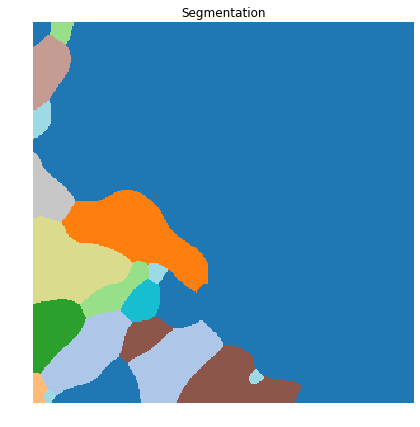

In [95]:
fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(segs[0][z_section, :], cmap='tab20')
ax.axis('off')  # clear x- and y-axes
plt.title('Segmentation')

### Evaluation

In [96]:
import h5py
gt_file = '/groups/funke/funkelab/sheridana/lsd_experiments/cremi/01_data/testing/sample_C_padded_20160501.aligned.filled.cropped.62:153.n5'
gt = z5py.File(gt_file, use_zarr_format=False, mode='r')['volumes/labels/neuron_ids'][bb_begin[0]:bb_end[0],  bb_begin[1]:bb_end[1],  bb_begin[2]:bb_end[2]]


Text(0.5, 1.0, 'Ground Truth')

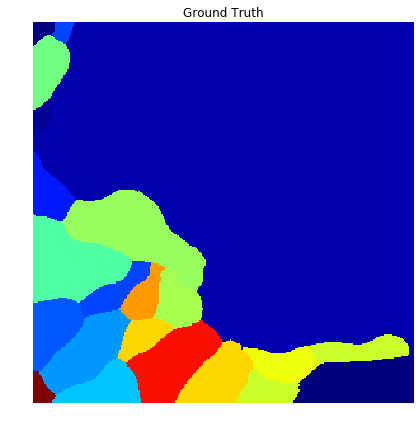

In [97]:
funlib.segment.arrays.relabel(gt, inplace=True)
fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(np.squeeze(gt[z_section, :]), cmap='jet')
ax.axis('off')  # clear x- and y-axes
plt.title('Ground Truth')

In [99]:
generator = waterz.agglomerate(aff_crop, thresholds=[0.00001, 0.5, 0.8], fragments=fragments,gt=gt.astype(np.uint32) )
segs = []
for seg, metric in generator:
    segs.append(seg)
    print(metric)

Re-using already compiled waterz version
Preparing segmentation volume...
{'V_Rand_split': 0.9850795019371856, 'V_Rand_merge': 0.9895295393007076, 'V_Info_split': 0.3335148834592423, 'V_Info_merge': 0.16647445799868077}
{'V_Rand_split': 0.9850795019371856, 'V_Rand_merge': 0.9895295393007076, 'V_Info_split': 0.3335148834592423, 'V_Info_merge': 0.16647445799868077}
{'V_Rand_split': 0.9850795019371856, 'V_Rand_merge': 0.9895295393007076, 'V_Info_split': 0.3335148834592423, 'V_Info_merge': 0.16647445799868077}


(-0.5, 299.5, 299.5, -0.5)

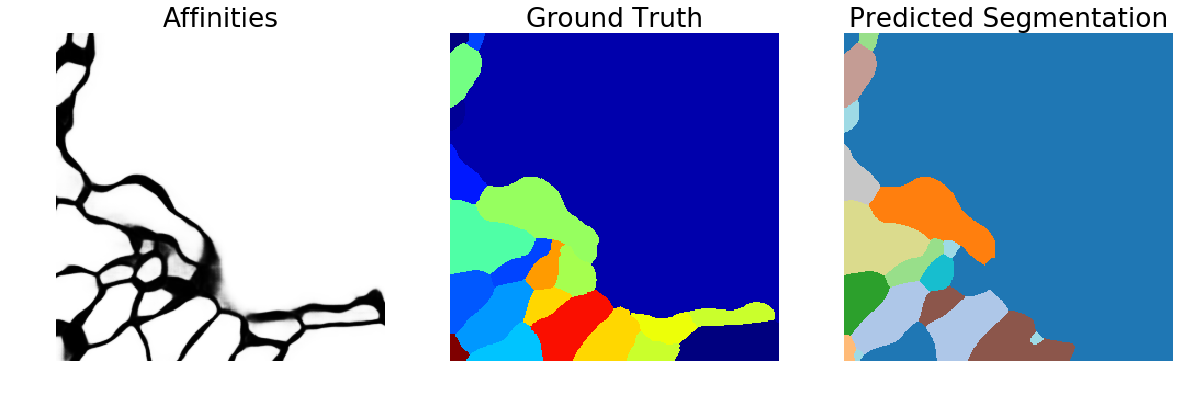

In [107]:
import matplotlib.gridspec as gridspec

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(20, 20))
gs = gridspec.GridSpec(1, 3)

ax = plt.subplot(gs[0,0])
plt.imshow(np.squeeze(aff_crop[0, z_section, :]), cmap='gray')
ax.set_title('Affinities')
ax.axis('off') 
ax = plt.subplot(gs[0,1])
ax.imshow(np.squeeze(gt[z_section, :]), cmap='jet')
ax.set_title('Ground Truth')
ax.axis('off') 
ax = plt.subplot(gs[0,2])
ax.imshow(segs[0][z_section, :], cmap='tab20')
ax.set_title('Predicted Segmentation')
ax.axis('off') 